In [1]:
import pandas as pd
import matplotlib as mat
import seaborn as sb
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [4]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [6]:
def column_type(x):
    categorical=[]
    numerical=[]
    for column in x.columns:                   
        if x[column].nunique() <25:
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical,numerical

In [7]:
categorical,numerical=column_type(df)

In [8]:
table=[categorical,numerical]
print(tabulate({"Categorical":categorical,"Continous":numerical},headers=['categorical','numerical']))

categorical          numerical
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


## Treating the null values

In [9]:



mode_nametype=st.mode(df['NAME_TYPE_SUITE'])
mode_nametype

'Unaccompanied'

In [10]:
mean_amountgood=df['AMT_GOODS_PRICE'].mean() 
mean_amountgood

538345.1489706662

In [11]:
df['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [12]:
df['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [14]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [15]:
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(538345.14)

In [16]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Laborers')

In [17]:
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(2.0)

In [18]:
df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [128]:
## OUTLIER ANALYSIS

Min=min(df['AMT_INCOME_TOTAL'])  
Max=max(df['AMT_INCOME_TOTAL']) 
Range=Max-Min
Q1=df['AMT_INCOME_TOTAL'].quantile(0.25)        
Q3=df['AMT_INCOME_TOTAL'].quantile(0.75)       
IQR=Q3-Q1                                
UF=Q3+1.5*IQR                         
LF=Q1-1.5*IQR  

In [129]:
UF

337500.0

In [130]:
LF

-22500.0

In [131]:
df1=df[df.AMT_INCOME_TOTAL<=337500]     
df2=df[(df.AMT_INCOME_TOTAL>337500)]

## Removed just the upper fence values and it wont effect our analysis as the number of outliers removed 872 which
## very less in number.

In [260]:
df2.value_counts().sum()                    

872

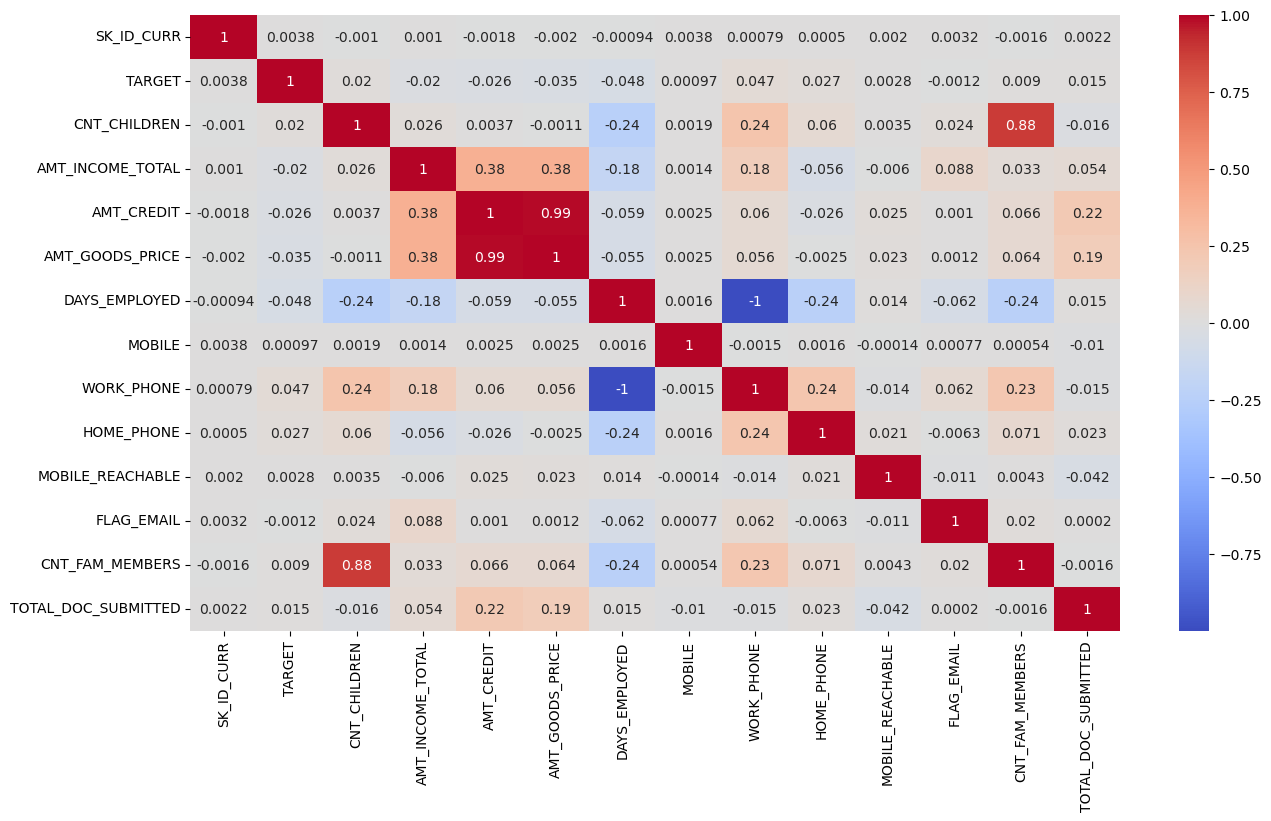

In [133]:
## Heat Map

cor=df1.corr()
plt.figure(figsize=(15,8))
sb.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

#### Very High Positive Correlation 
##### Cnt FAMily members vs Cnt-Childer
##### amount goods price vs amount credit
#### Moderate Positve Correlation
##### amount income total vs Credit Amount

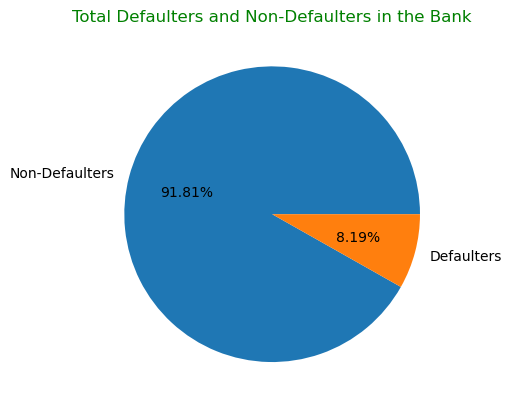

In [384]:
plt.pie(df1.TARGET.value_counts(),labels=['Non-Defaulters','Defaulters'],autopct="%0.2f%%")
plt.title('Total Defaulters and Non-Defaulters in the Bank',color='green')
plt.show()

##### 91.81%  Customers are Non-Defaulters and 8.19% Are Defaulters in the Bank.


## ANAlYSIS APPROACH 

### Analysing  the Defaulters And Non- Defaulters Seperately.
### According to data we ll see which can be considered among who have a chance to default as probablity .5.That means they might or might not default the loans.

##  Analysing the data of  customers who are DEFAULTERS.

In [136]:
### Filtering the data of defaulters.

default=df1[df1.TARGET==1]

In [137]:
default

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,Laborers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,586,1,1,0,1,0,Laborers,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,1669,1,1,0,1,0,Laborers,2.0,SATURDAY,1


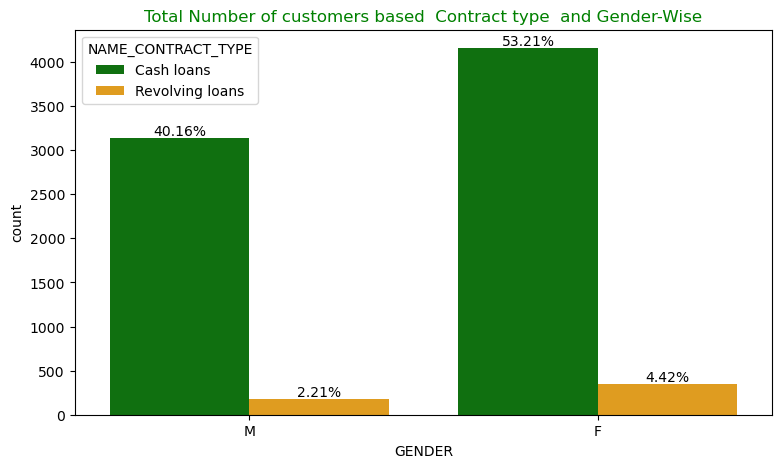

In [285]:
fig=plt.figure(figsize=(9,5))
sb.countplot(hue=default['NAME_CONTRACT_TYPE'],x=default['GENDER'],palette=[ 'green',  'orange' ])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(default)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Total Number of customers based  Contract type  and Gender-Wise',color='g')
plt.show()

#### 53.21% Females and 40.16%  Male Customers defaulted the Cash Loans.

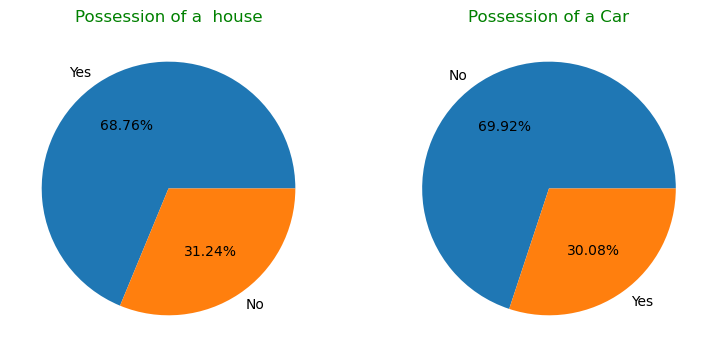

In [382]:
fig=plt.figure(figsize=(9,5))
plt.subplot(121)
plt.pie(default.House.value_counts(),labels=['Yes','No'],autopct="%0.2f%%")
plt.title('Possession of a  house',color='green')

plt.subplot(122)
plt.pie(default.Car.value_counts(),labels=['No','Yes'],autopct="%0.2f%%")
plt.title('Possession of a Car',color='green')
plt.show()


#### 68.7% of customers own a car and 69.92% customers dont own a Car.

In [144]:
### There are more customers who have been defaulting Cash loans and  for Revolving loans there isnt much data for a concrete 
### Conclusion.


In [294]:
# filering the data of customers who defaulted cash loans and had a house and didnt own a car.


cash_default=default[(default.NAME_CONTRACT_TYPE=='Cash loans')&(default.Car=='N')&(default.House=='Y')]

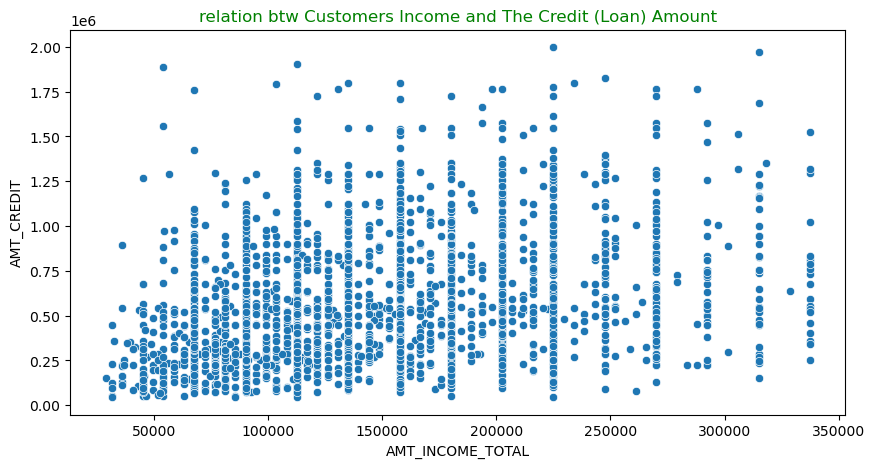

In [383]:

fig=plt.figure(figsize=(10,5))
sb.scatterplot(cash_default.AMT_INCOME_TOTAL,cash_default.AMT_CREDIT)
plt.title('relation btw Customers Income and The Credit (Loan) Amount',color='g')
plt.show()


#### there isnt a specific pattern we can observe but we can see that More number of loans near 50000 to 150000  Income Amount

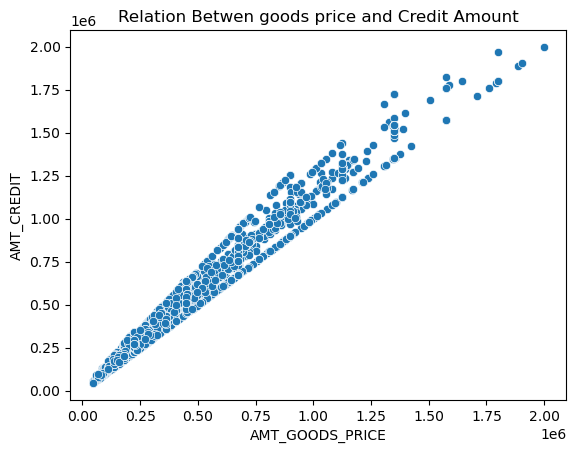

In [313]:
sb.scatterplot(cash_default.AMT_GOODS_PRICE,cash_default.AMT_CREDIT)
plt.title('Relation Betwen goods price and Credit Amount')
plt.show()

#### Strong positive Correlation btw Amount goods price and Amount Credit

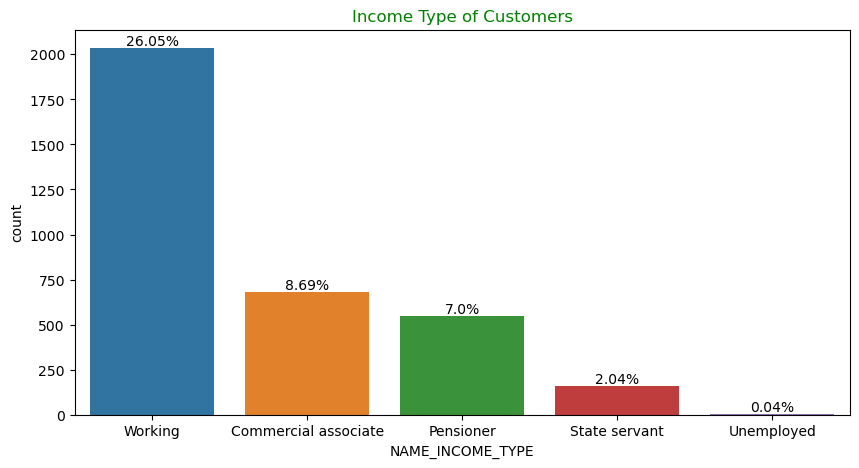

In [326]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=cash_default['NAME_INCOME_TYPE'])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(default)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Income Type of Customers',color='green')
plt.show()

#### 26.05% workers  defaulted the maximum cash loans.

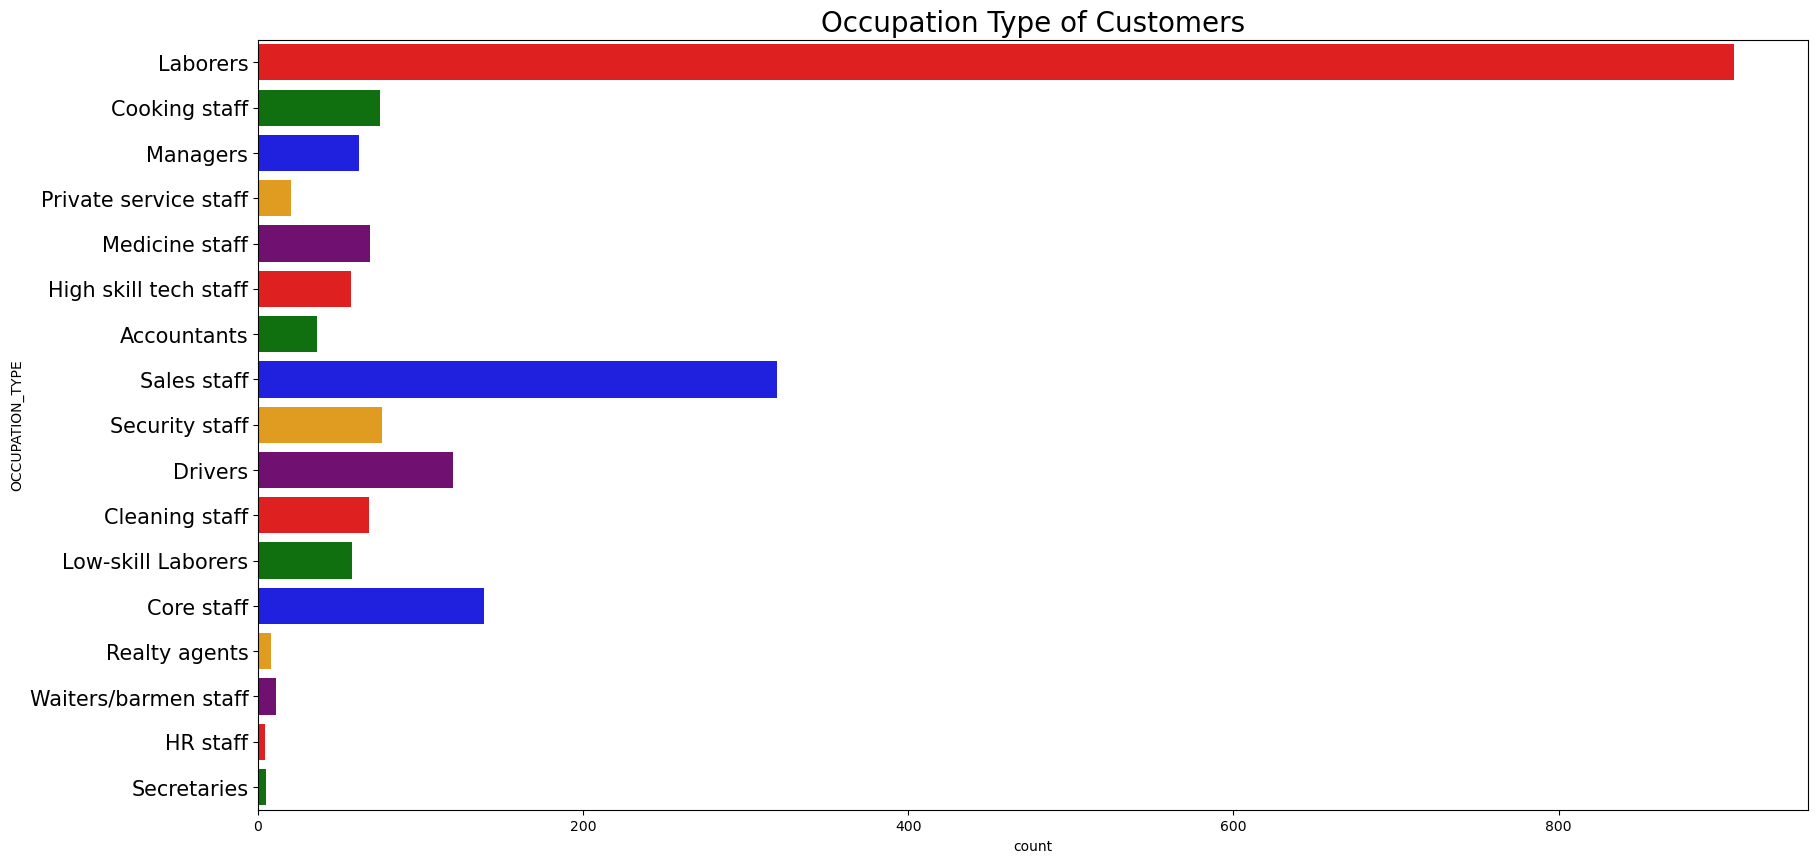

In [329]:
w=cash_default[cash_default.NAME_INCOME_TYPE=='Working']
colors = ['red', 'green', 'blue', 'orange', 'purple']

fig=plt.figure(figsize=(20,10))
x=sb.countplot(y=w['OCCUPATION_TYPE'],palette=colors)
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.title('Occupation Type of Customers',fontsize=20)
plt.show()

In [330]:
## Filtering the customers who are Laborer.

laborers=w[w.OCCUPATION_TYPE=='Laborers']


In [331]:
# now checking  how many people had income more than the credit and who had less than

x4=laborers[laborers['AMT_CREDIT'] > laborers['AMT_INCOME_TOTAL']]
x5=laborers[laborers['AMT_CREDIT'] < laborers['AMT_INCOME_TOTAL']]

In [155]:
x4.value_counts().sum()

872

In [156]:
x5.value_counts().sum()

34

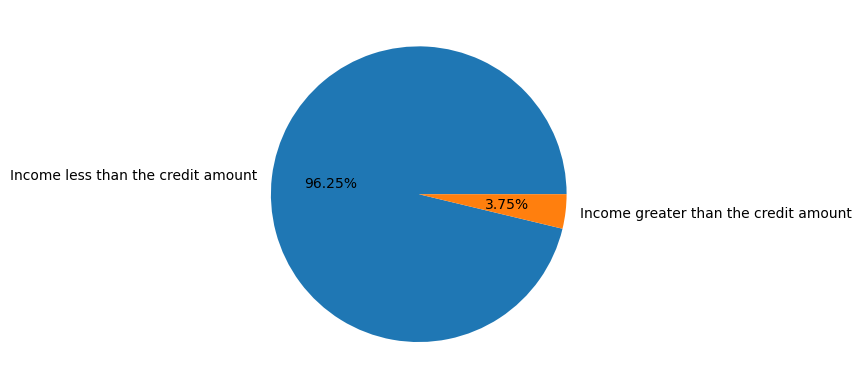

In [213]:
pie_x4_x5_values=[x4.value_counts().sum(),x5.value_counts().sum()]
pie_x4_x5=['Income less than the credit amount','Income greater than the credit amount']
plt.pie(pie_x4_x5_values,labels=pie_x4_x5,autopct='%0.2f%%')
plt.show()

#### The 96.25 % defaulters had income less than the Credit Amount.


In [160]:
## checking the education background.

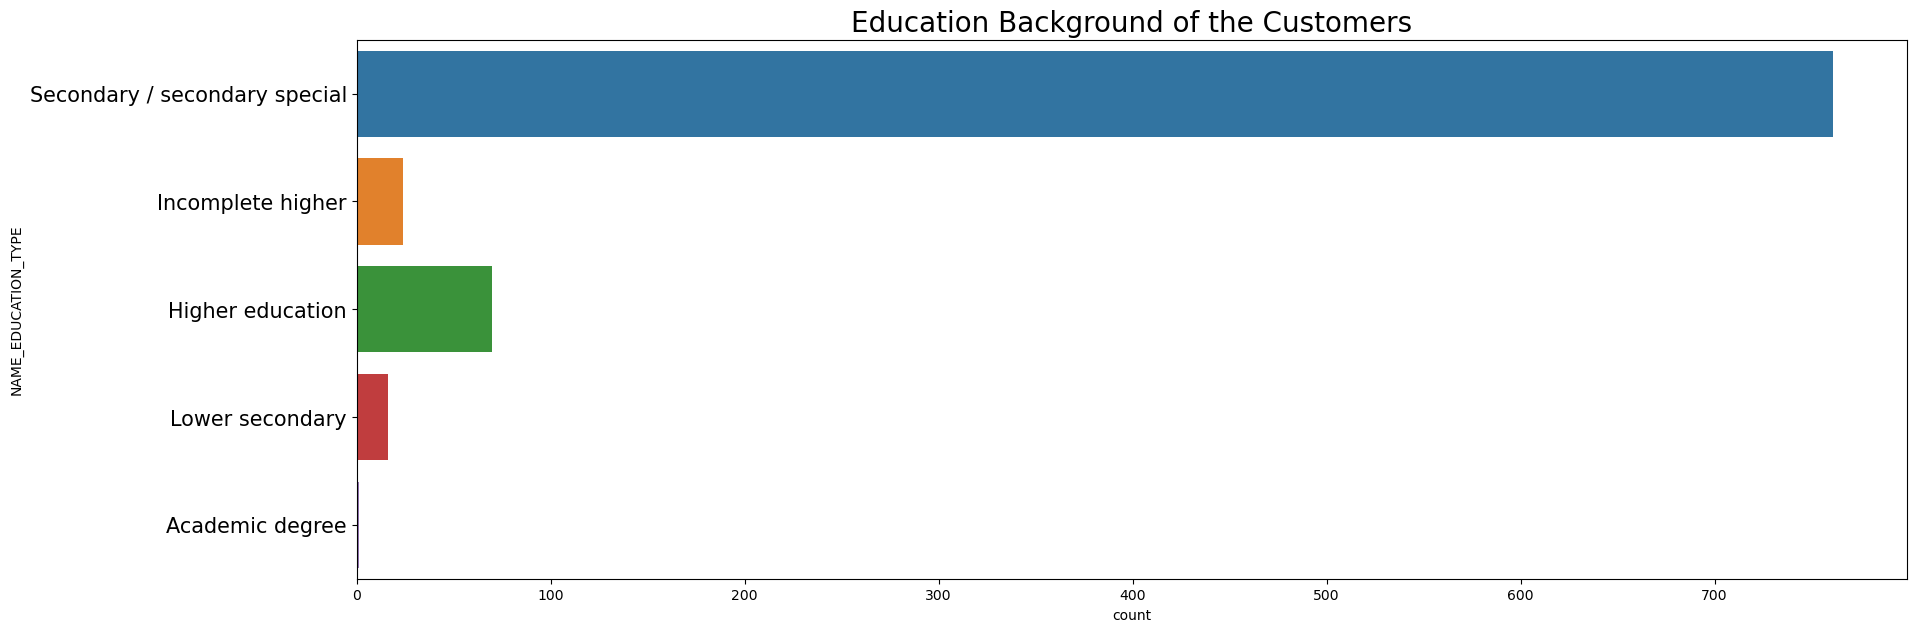

In [333]:
fig=plt.figure(figsize=(20,7))
x=sb.countplot(y=x4['NAME_EDUCATION_TYPE'])
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.title('Education Background of the Customers',fontsize=20)
plt.show()


####  The majority of customers are laborers and they had Secondary/Secondary specical Education Background.

In [334]:
##Filtering  the  Secondary/Secondary specical Education Background customers.

In [164]:
x7=x4[(x4.NAME_EDUCATION_TYPE=='Secondary / secondary special')]

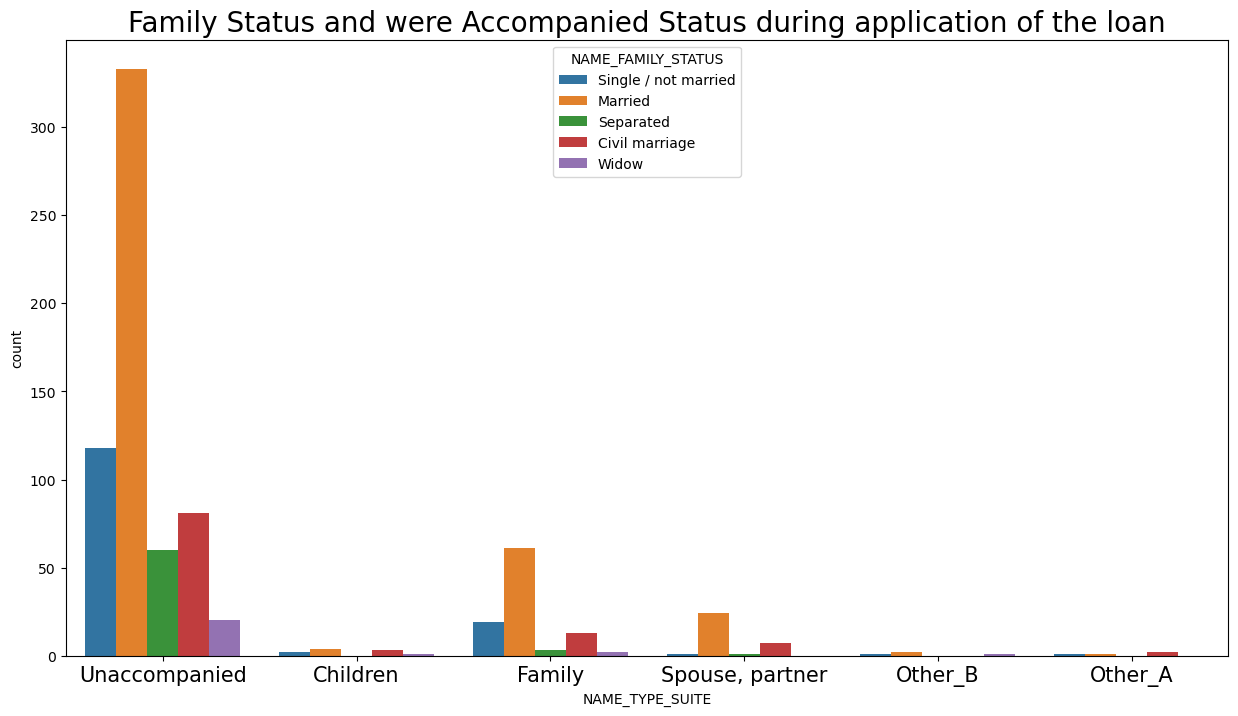

In [336]:
fig=plt.figure(figsize=(15,8))
x=sb.countplot(x=x7['NAME_TYPE_SUITE'],hue=x7.NAME_FAMILY_STATUS)
x.set_xticklabels(x.get_xticklabels(), fontsize=15)
plt.title('Family Status and were Accompanied Status during application of the loan',fontsize=20)
plt.show()

In [339]:
## now lets look at the family information of the customers.

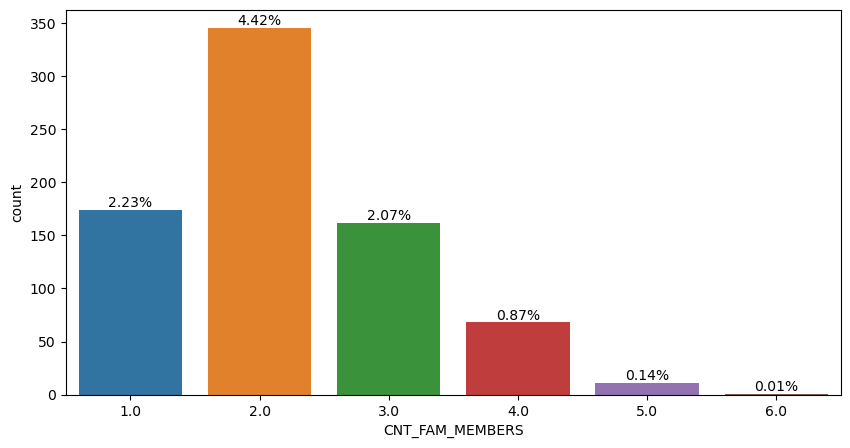

In [337]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=x7['CNT_FAM_MEMBERS'])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(default)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Number of Family Members')

plt.show()

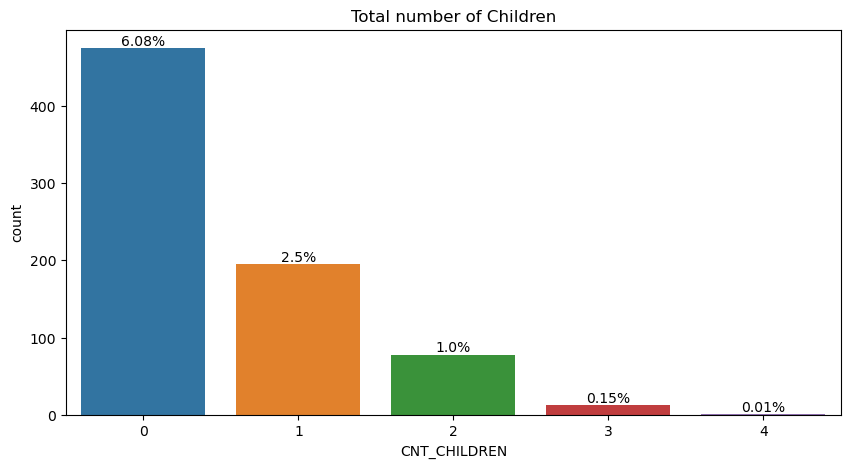

In [379]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=x7['CNT_CHILDREN'])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(default)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Total number of Children')
plt.show()

In [170]:
# The majority of customers are laborers who have Secondary Education are married and have income less than the credit amount.

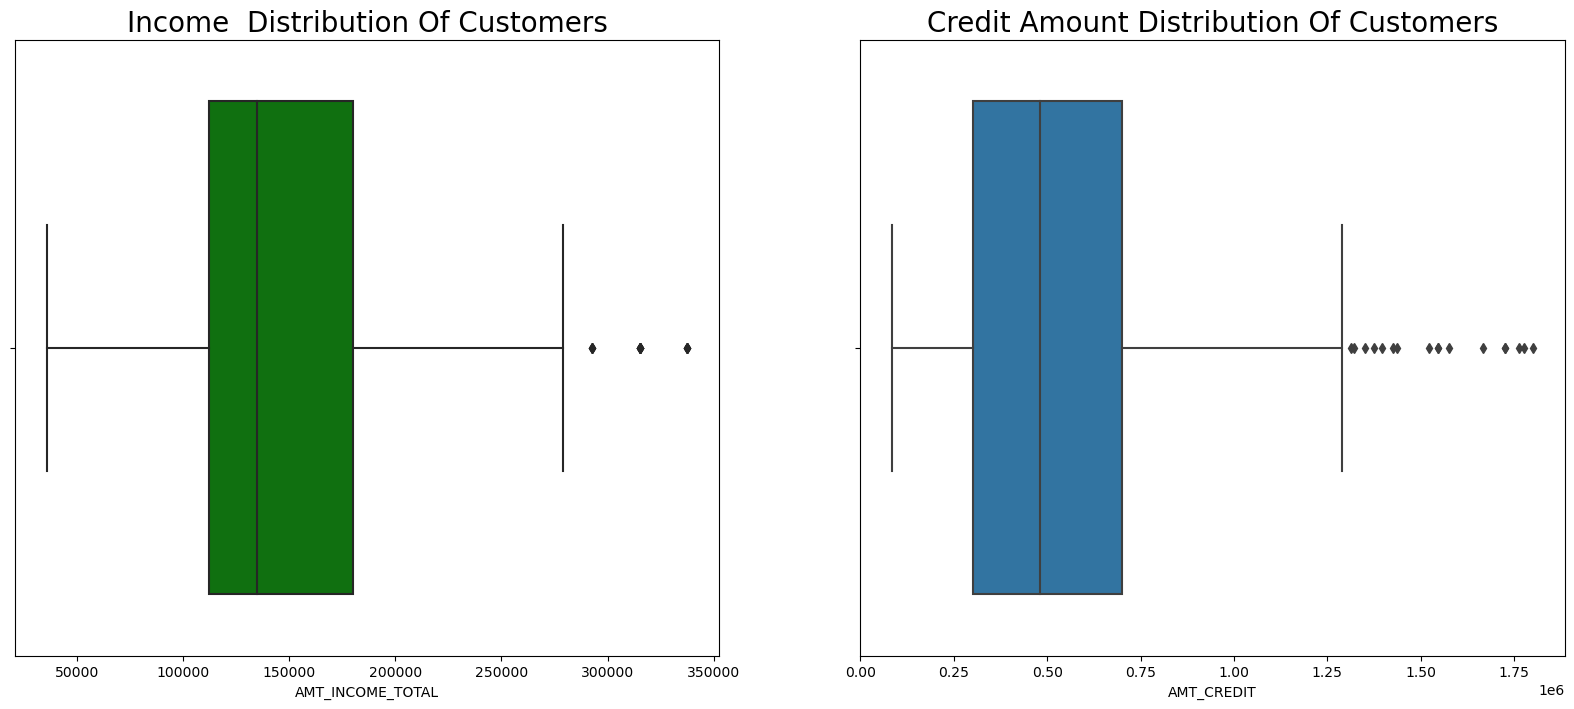

In [343]:
# lets check the salaries of the Customers in the above Criteria.
plt.figure(figsize=(20,8))
plt.subplot(121)
sb.boxplot(x=x7.AMT_INCOME_TOTAL,color='green')
plt.title('Income  Distribution Of Customers',fontsize=20)

plt.subplot(122)
sb.boxplot(x=x7.AMT_CREDIT)
plt.title('Credit Amount Distribution Of Customers',fontsize=20)
plt.show()



In [172]:
## not let calculate central tendencies of the the customers who were in the above Criteria.


l2=x7.groupby(['GENDER'])[['AMT_CREDIT','AMT_INCOME_TOTAL']].agg(['mean', 'std', 'median'])
l2


AMT_CREDIT                          AMT_INCOME_TOTAL                \
                 mean            std    median             mean           std   
GENDER                                                                          
F       546972.489717  316283.067443  472500.0    135814.974293  53387.784531   
M       541058.987903  286555.125695  491179.5    159188.552419  56005.711403   

                  
          median  
GENDER            
F       121500.0  
M       157500.0

#### the mean credit amount for females is slightly higher than that for males, but the standard deviation is also higher, indicating that there is more variability in the credit amounts for females. The median credit amount for females is lower than that for males, suggesting that there may be more females with lower credit amounts compared to males. 

## INTERPRETATION


### The customers were married laborers from the working class.
### They owned a house but did not have a car.
### They were unaccompanied when they came to apply for the loan.
### Their income was less than the credit amount.
### The goods price was almost equal to the credit amount.
### 53.21% were females among these defaulters.

## Family information

###  6.02% customers had no children.
### 4.42 Customers had 2 family members.

### The fact that the customers' income is less than the credit amount could be viewed as a negative factor, as it suggests that they may have difficulty making payments on the loan if it is granted.

### The fact that the goods price is almost equal to the credit amount could be viewed as a potential risk factor, as it suggests that the customers may not have much financial assets.

### While the customers own a house, they do not have a car, which means that they may not have sufficient collateral to secure the loan.

## Analysing the data of  Non-Defaulters

In [219]:
non_defaulters=df1[df1.TARGET==0]

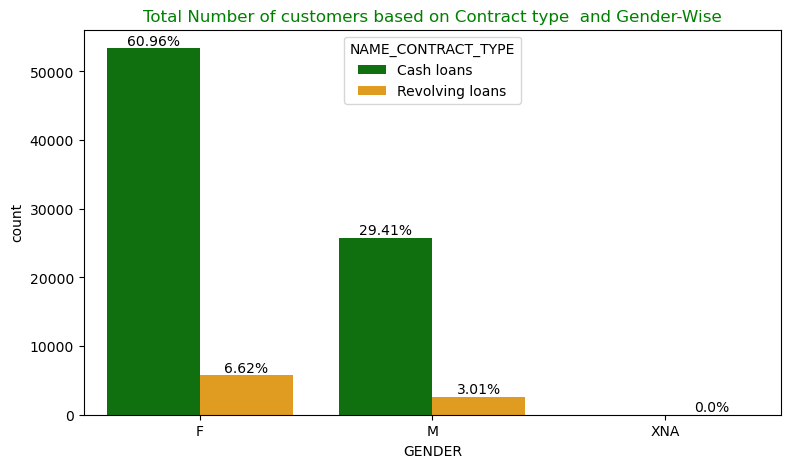

In [345]:
fig=plt.figure(figsize=(9,5))
sb.countplot(hue=non_defaulters['NAME_CONTRACT_TYPE'],x=non_defaulters['GENDER'],palette=[ 'green',  'orange' ])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(non_defaulters)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Total Number of customers based on Contract type  and Gender-Wise',color='g')
plt.show()

#### 60.96% Females and 29.41%  Male Customers defaulted the Cash Loans.

In [ ]:
## more data available for Cash loans.So analysis will be based for the cash loans.

In [227]:
# Filtering the customers who were issued cash loans

z1=non_defaulters[non_defaulters.NAME_CONTRACT_TYPE=='Cash loans']

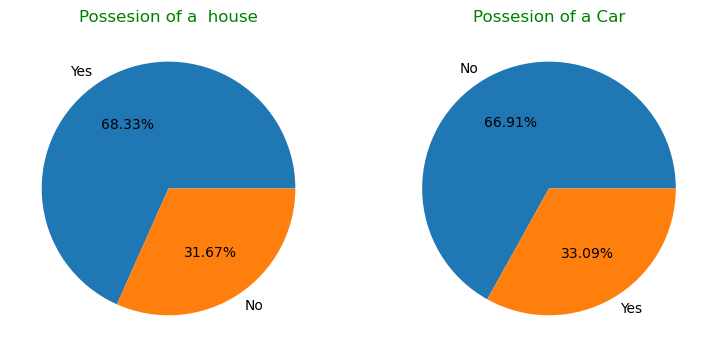

In [347]:
fig=plt.figure(figsize=(9,5))
plt.subplot(121)
plt.pie(z1.House.value_counts(),labels=['Yes','No'],autopct="%0.2f%%")
plt.title('Possession of a  house',color='green')

plt.subplot(122)
plt.pie(z1.Car.value_counts(),labels=['No','Yes'],autopct="%0.2f%%")
plt.title('Possession of a Car',color='green')
plt.show()

#### 68.33% Customers had a house and 66.91% customers didnt own a Car

In [228]:
z3=z1[z1['AMT_CREDIT'] > z1['AMT_INCOME_TOTAL']]
z4=z1[z1['AMT_CREDIT'] < z1['AMT_INCOME_TOTAL']]

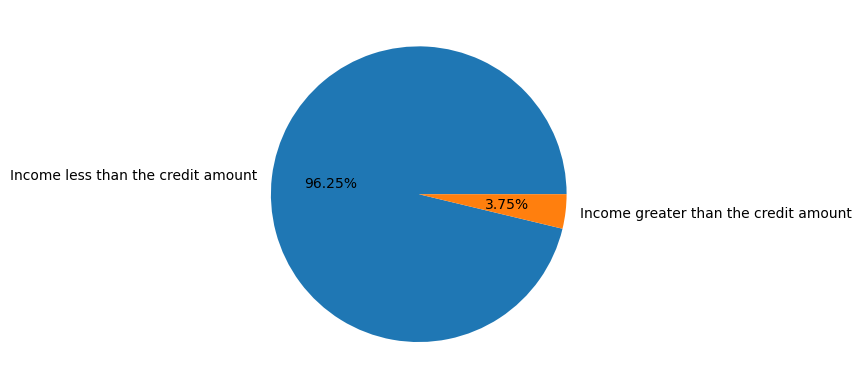

In [348]:
pie_x4_x5_values=[x4.value_counts().sum(),x5.value_counts().sum()]
pie_x4_x5=['Income less than the credit amount','Income greater than the credit amount']
plt.pie(pie_x4_x5_values,labels=pie_x4_x5,autopct='%0.2f%%')
plt.show()

In [230]:
#### The 96.25 % defaulters had income less than the Credit Amount.

In [231]:
# Have a house  and dont have a Car.

z5=z3[(z3.Car=='N') & (z3.House=='Y')]

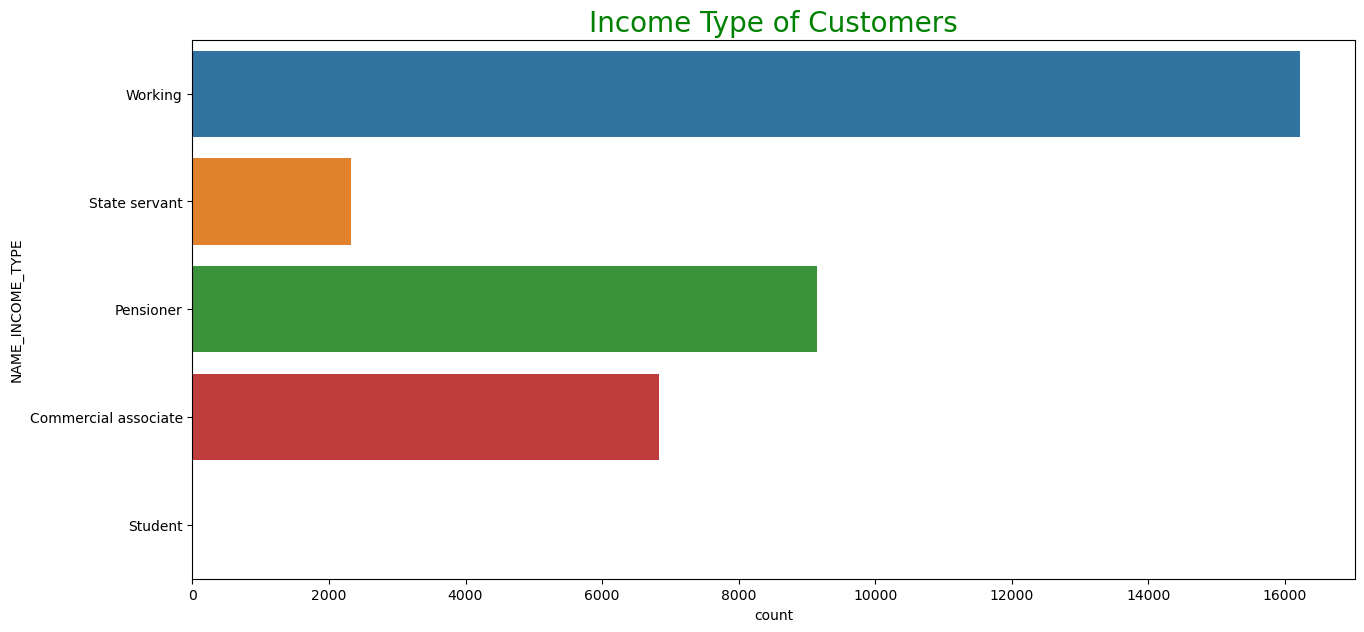

In [352]:
fig=plt.figure(figsize=(15,7))
sb.countplot(y=z5['NAME_INCOME_TYPE'])
plt.title('Income Type of Customers',color='green',fontsize=20)
plt.show()


In [234]:
## can definetly sure about working people but cant be so sure about pensioner and Commercial.
# So analysing them seperately.

In [235]:
working=z5[z5.NAME_INCOME_TYPE=='Working']
pen_Com=z5[(z5.NAME_INCOME_TYPE=='Commercial associate')|(z5.NAME_INCOME_TYPE=='Pensioner')]   ## not really sure

In [236]:
### For Working Customers.

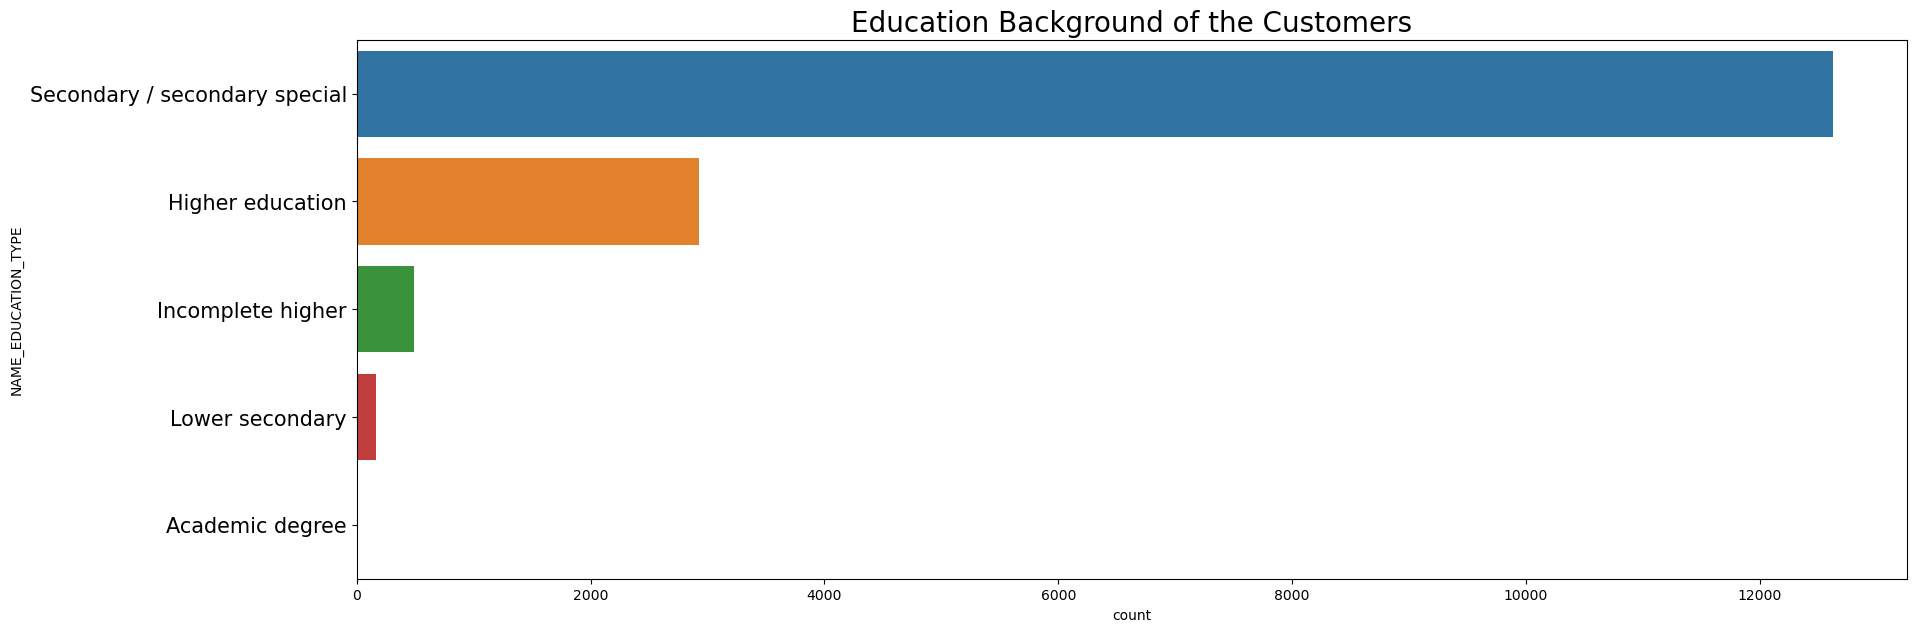

In [385]:
fig=plt.figure(figsize=(20,7))
x=sb.countplot(y=working['NAME_EDUCATION_TYPE'])
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.title('Education Background of the Customers',fontsize=20)
plt.show()


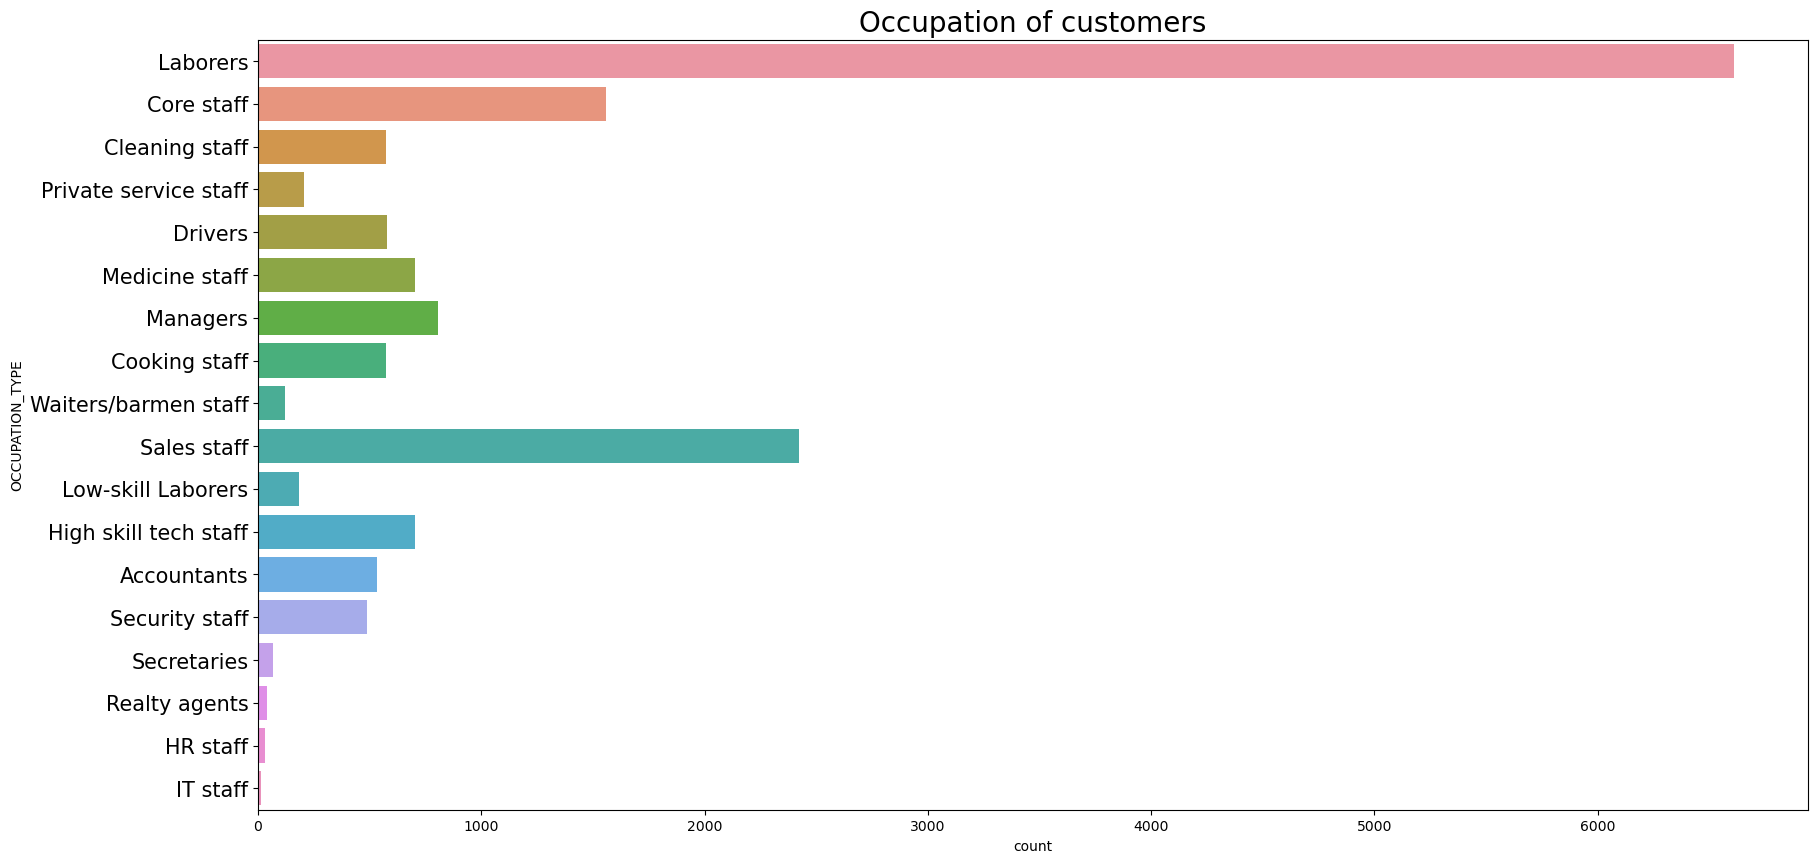

In [367]:
fig=plt.figure(figsize=(20,10))
x=sb.countplot(y=working['OCCUPATION_TYPE'])
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.title('Occupation of customers',fontsize=20)
plt.show()

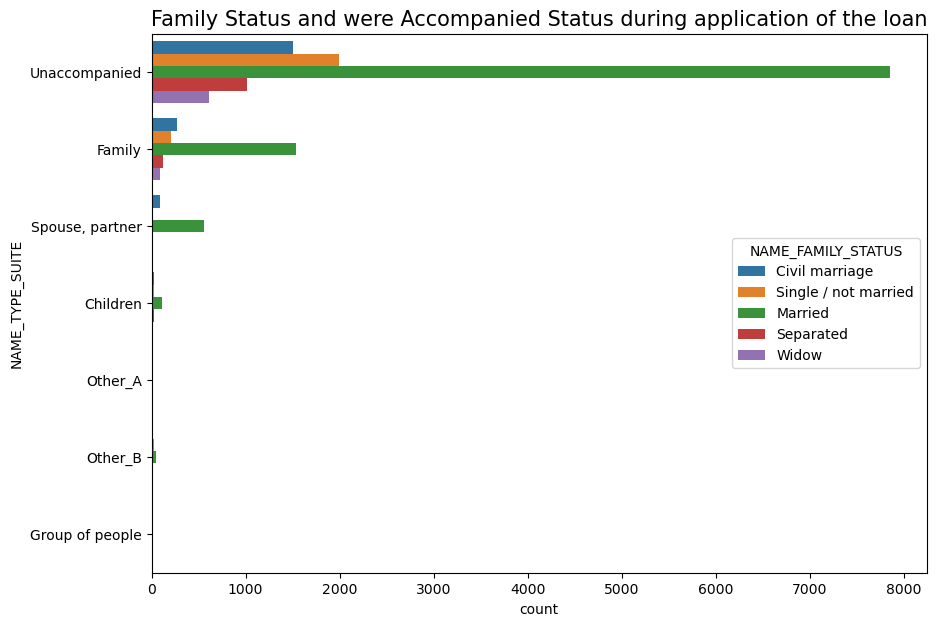

In [369]:
fig=plt.figure(figsize=(10,7))
sb.countplot(y=working['NAME_TYPE_SUITE'],hue=working['NAME_FAMILY_STATUS'])
plt.title('Family Status and were Accompanied Status during application of the loan',fontsize=15)
plt.show()

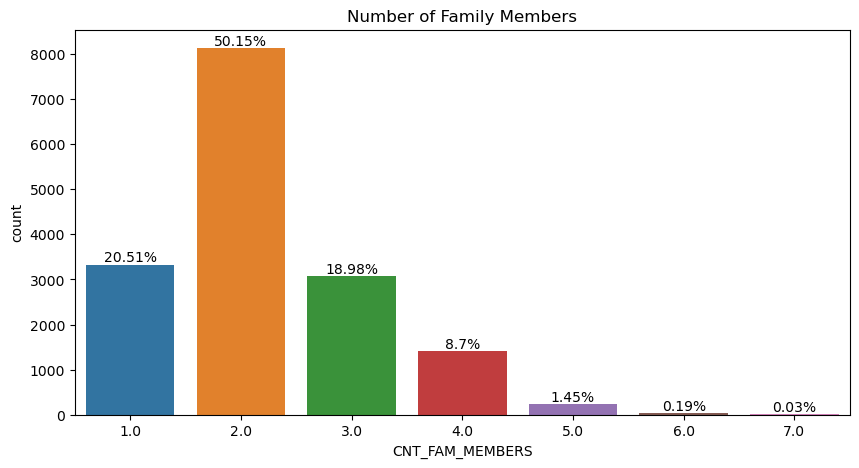

In [380]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=working['CNT_FAM_MEMBERS'])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(working)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Number of Family Members')

plt.show()

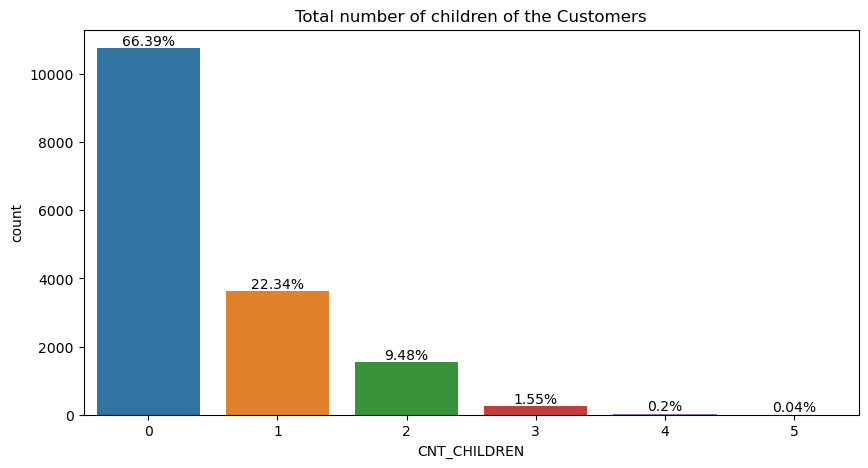

In [378]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=working['CNT_CHILDREN'])
plt.title('Total number of children of the Customers')
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(working)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.show()

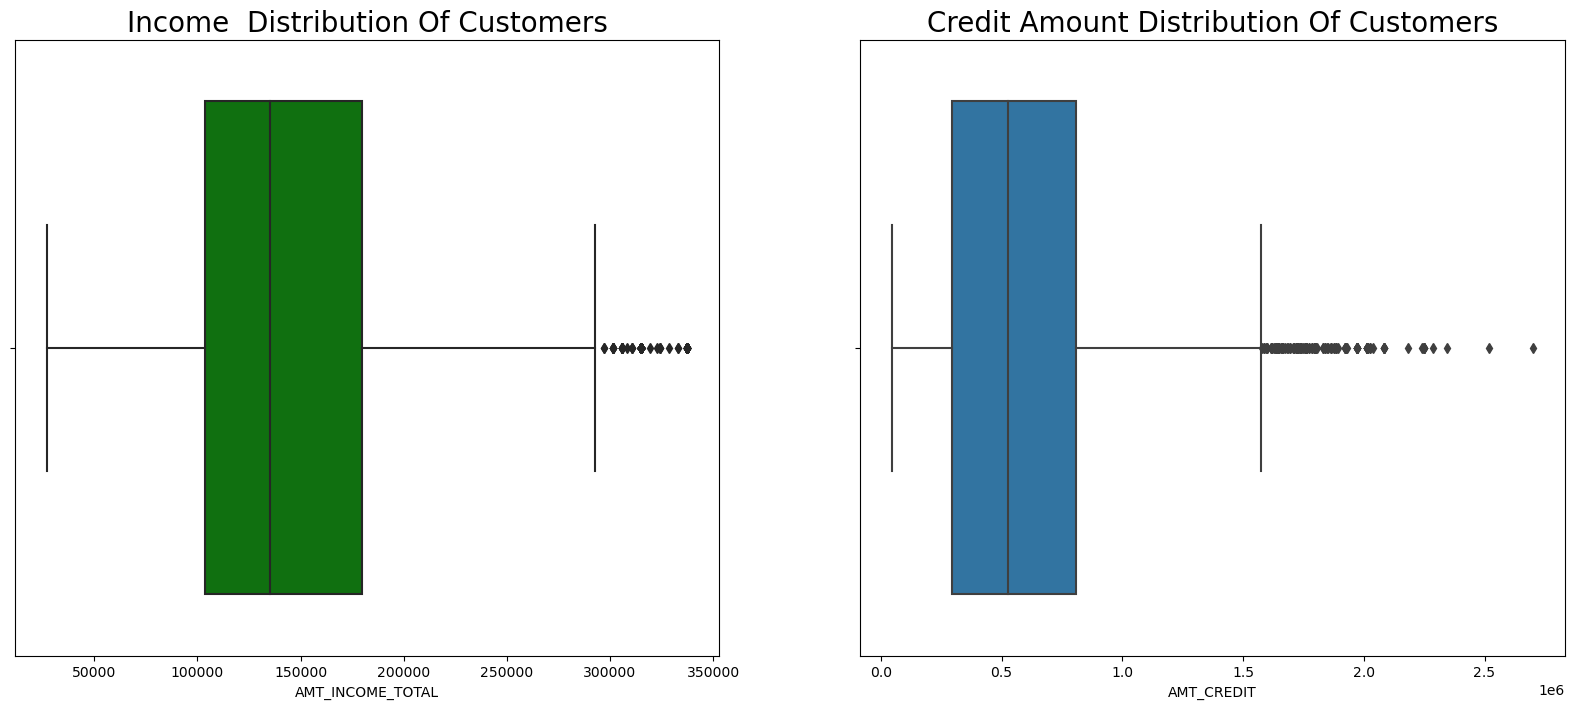

In [362]:
# lets check the salaries of the Customers in the above Criteria.
plt.figure(figsize=(20,8))
plt.subplot(121)
sb.boxplot(x=working.AMT_INCOME_TOTAL,color='green')
plt.title('Income  Distribution Of Customers',fontsize=20)

plt.subplot(122)
sb.boxplot(x=working.AMT_CREDIT)
plt.title('Credit Amount Distribution Of Customers',fontsize=20)
plt.show()



In [370]:
## not let calculate central tendencies of the the customers who were in the above Criteria.


l3=working.groupby(['GENDER'])[['AMT_CREDIT','AMT_INCOME_TOTAL']].agg(['mean', 'std', 'median'])
l3


AMT_CREDIT                          AMT_INCOME_TOTAL                \
                 mean            std    median             mean           std   
GENDER                                                                          
F       600988.891257  360965.955533  536917.5    141148.953022  57973.461627   
M       578501.477129  345046.817423  513531.0    158390.769322  58808.313220   

                  
          median  
GENDER            
F       135000.0  
M       148500.0

#### Not much difference btw the Males and females income and Credit Amount.

# For pensioner and associate. 50-50 chances of defaulting or not defaulting.

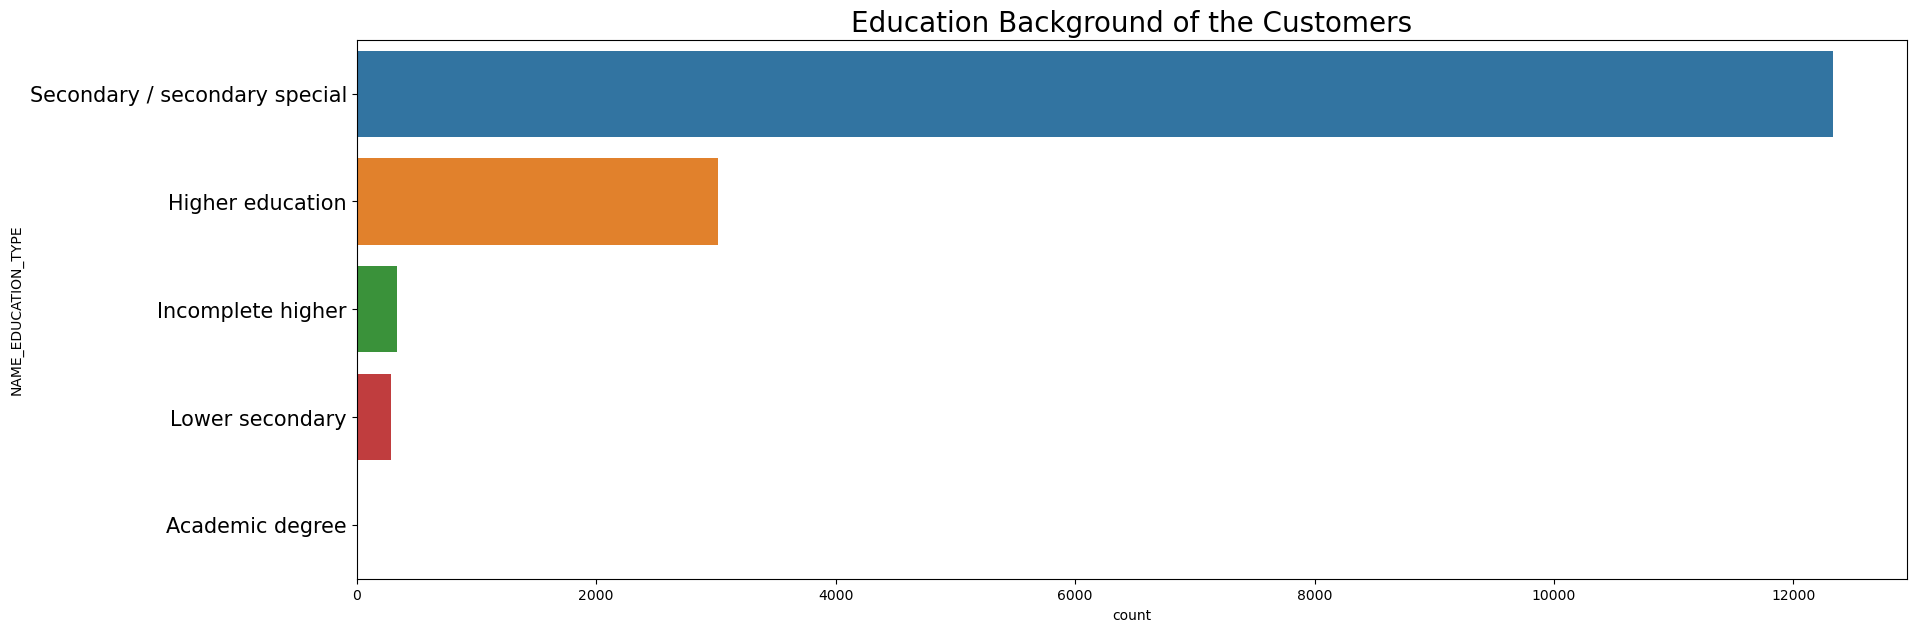

In [386]:
fig=plt.figure(figsize=(20,7))
x=sb.countplot(y=pen_Com['NAME_EDUCATION_TYPE'])
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.title('Education Background of the Customers',fontsize=20)
plt.show()


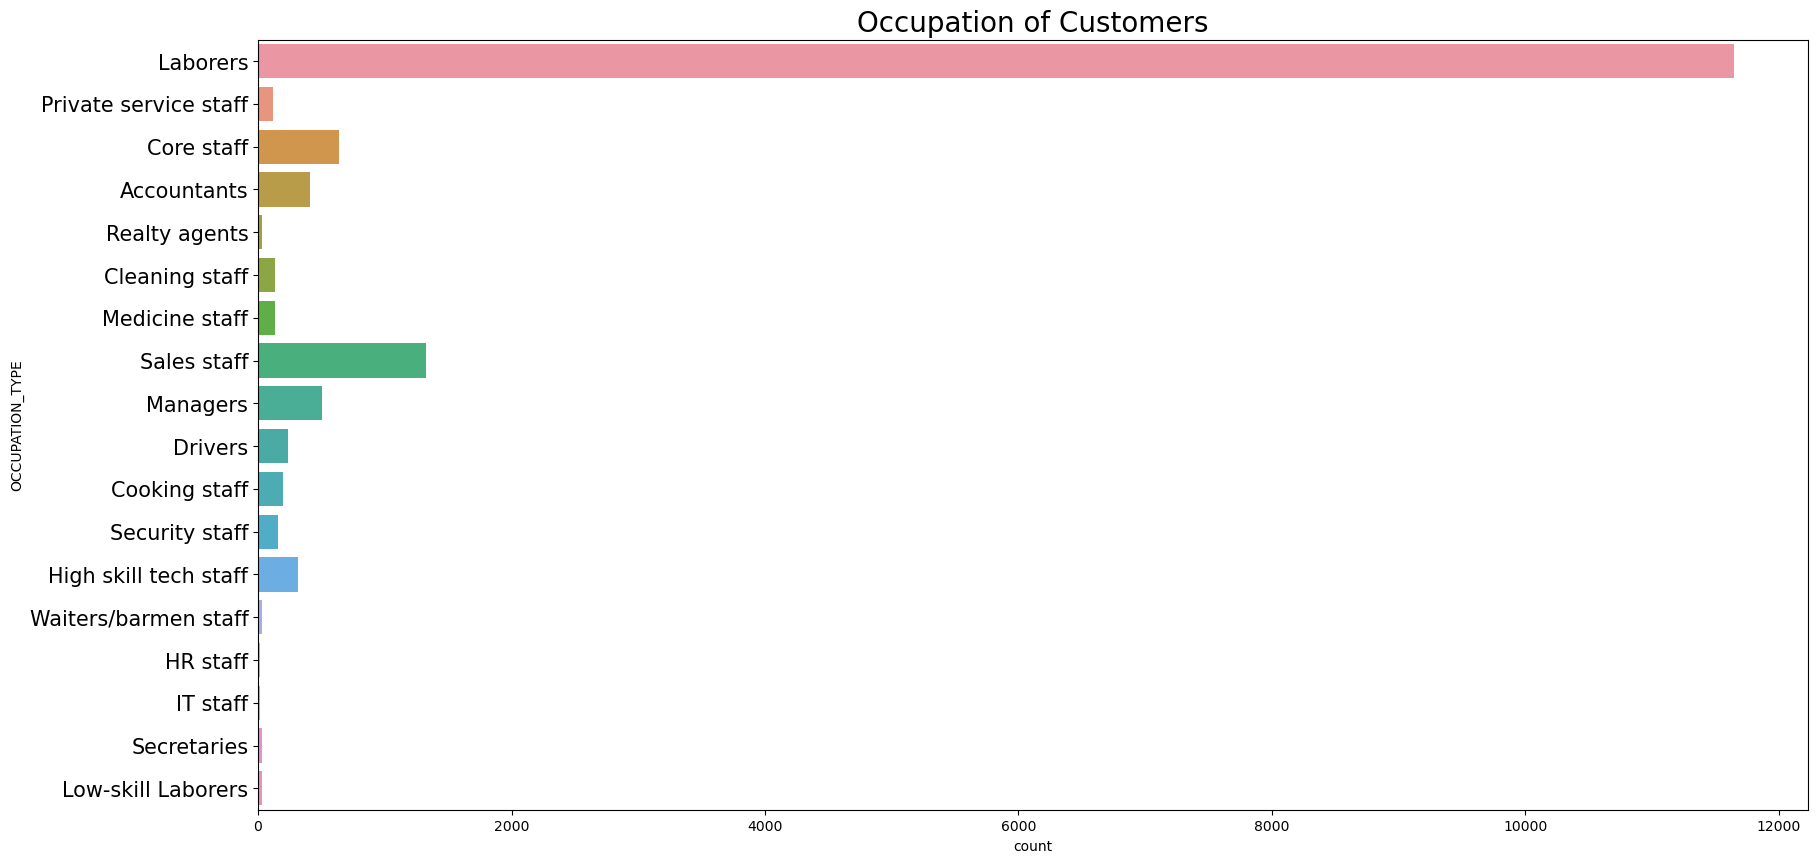

In [366]:
fig=plt.figure(figsize=(20,10))
x=sb.countplot(y=pen_Com['OCCUPATION_TYPE'])
plt.title('Occupation of Customers',fontsize=20)
x.set_yticklabels(x.get_yticklabels(), fontsize=15)
plt.show()


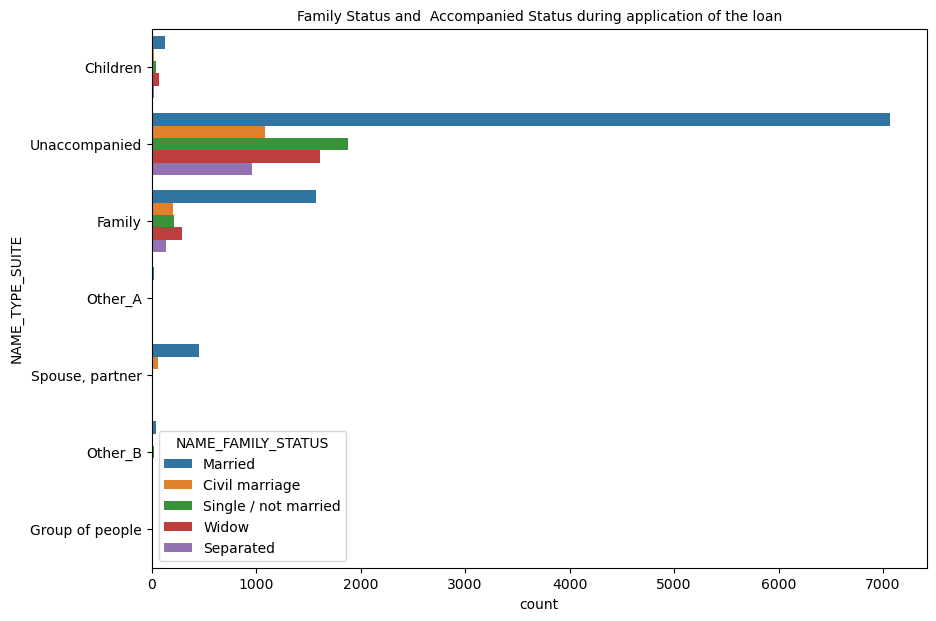

In [356]:
fig=plt.figure(figsize=(10,7))
sb.countplot(y=pen_Com['NAME_TYPE_SUITE'],hue=pen_Com['NAME_FAMILY_STATUS'])
plt.title('Family Status and  Accompanied Status during application of the loan',fontsize=10)
plt.show()

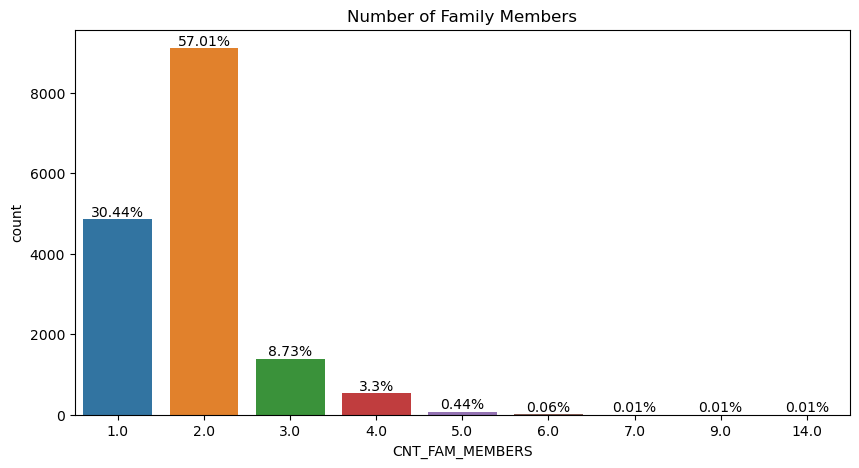

In [381]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=pen_Com['CNT_FAM_MEMBERS'])
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(pen_Com)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.title('Number of Family Members')

plt.show()

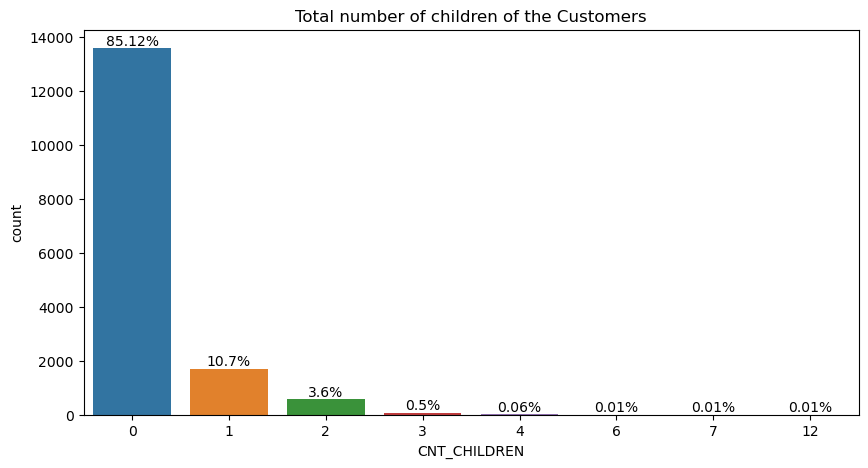

In [377]:
fig=plt.figure(figsize=(10,5))
sb.countplot(x=pen_Com['CNT_CHILDREN'])
plt.title('Total number of children of the Customers')
for i in plt.gca().patches:            
    con_values=f"{round(i.get_height() /len(pen_Com)*100, 2)}%"
    x=i.get_x() + i.get_width() /2     
    y=i.get_height() 
    plt.annotate(con_values,(x,y),va='bottom',ha='center')
plt.show()

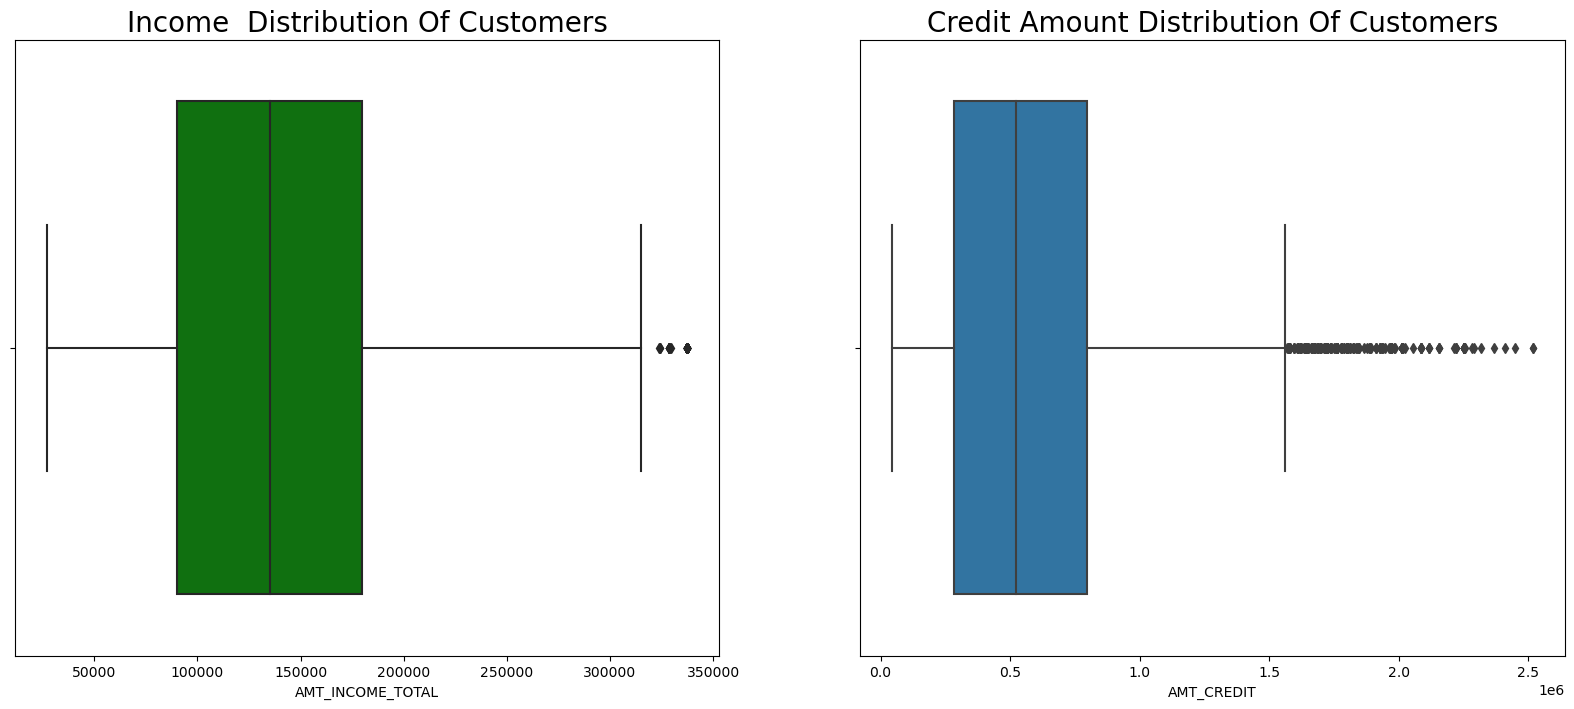

In [361]:
# lets check the salaries of the Customers in the above Criteria.
plt.figure(figsize=(20,8))
plt.subplot(121)
sb.boxplot(x=pen_Com.AMT_INCOME_TOTAL,color='green')
plt.title('Income  Distribution Of Customers',fontsize=20)

plt.subplot(122)
sb.boxplot(x=pen_Com.AMT_CREDIT)
plt.title('Credit Amount Distribution Of Customers',fontsize=20)
plt.show()



In [242]:
### Now to interpret both of them seperately then see about their family structure.

In [372]:
## Now lets calculate central tendencies of the the customers who were in the above Criteria.


l4=pen_Com.groupby(['GENDER'])[['AMT_CREDIT','AMT_INCOME_TOTAL']].agg(['mean', 'std', 'median'])
l4


AMT_CREDIT                          AMT_INCOME_TOTAL                \
                 mean            std    median             mean           std   
GENDER                                                                          
F       590959.263807  374322.469520  521280.0    142020.588047  62268.474907   
M       603102.038713  378690.339499  521280.0    160000.074118  68517.237186   

                  
          median  
GENDER            
F       135000.0  
M       157500.0

####  There may be some differences between males and females in terms of their credit amounts and income levels. 

# INTERPRETATION

## Should be given the loan.

### The customers were married laborers from the working class.
### They owned a house but did not have a car.
### They were unaccompanied when they came to apply for the loan.
### Their income was less than the credit amount.
### The goods price was almost equal to the credit amount.
### 60.96% were females among these defaulters.

## Family information

###  66.39% customers had no children.
### 50.15 Customers had 2 family members.

### The fact that the customers are married laborers from the working class may suggest that they have stable employment and income sources, which could be viewed as a positive factor.
### The fact that the customers own a house but do not have a car may suggest that they prioritize housing over other types of assets, which could also be viewed as a positive factor.



### 50-50% chances to give or not give.

### The customers were married laborers from the pensioners and commercial associate.
### They owned a house but did not have a car.
### They were unaccompanied when they came to apply for the loan.
### Their income was less than the credit amount.
### The goods price was almost equal to the credit amount.

## Family information

### 85.12% customers had no children.
### 57.01% Customers had 2 family members.

###  This may suggest that the customers are retired or have lower income sources, which could be a negative factor
### The fact that the customers are married  may suggest that they have stable employment and income sources,.


### Lending decisions should be made on a case-by-case basis, taking into consideration various factors based on financial and personal information
